In [1]:
import numpy as np
from scipy.io import wavfile

from utils.ICA_utils import FastIca, norm_signals, audio_widget, complete_plot

In [2]:
import warnings
# Suppressione specifica delle avvertenze WavFileWarning
warnings.filterwarnings("ignore", category=wavfile.WavFileWarning)

# Demo

This notebook represents a small demo of the ICA algorithm applied to complex signals (a voice and a piano)

Here we import audio the files

In [3]:
# Read the audio file as np array
fs, audio_np_1 = wavfile.read('audio/piano2.wav') 
_ , audio_np_2 = wavfile.read('audio/voice1.wav') 

The audio files are cropped and normalized

In [4]:
# Checking the file sizes
print("file 1 shape: ", audio_np_1.shape)
print("file 2 shape: ", audio_np_2.shape)
print("\n")

# Cropping the files to the same size choosing the shorter one
cropped_size = np.minimum(audio_np_1.shape[0], audio_np_2.shape[0])

audio_np_1 = audio_np_1[:cropped_size]
audio_np_2 = audio_np_2[:cropped_size]

# File sizes after cropping
print("file 1 shape: ", audio_np_1.shape)
print("file 2 shape: ", audio_np_2.shape)

# Normalization between [-1,+1] and reshape in row form 
audio_np_1_norm = norm_signals(audio_np_1)
audio_np_2_norm = norm_signals(audio_np_2)

file 1 shape:  (169600,)
file 2 shape:  (157217,)


file 1 shape:  (157217,)
file 2 shape:  (157217,)


Building the source, the mixing matrice and the mixed signals

In [5]:
# number of samples
t = np.arange(0, cropped_size)

# Sources matrix
S = np.concatenate((audio_np_1_norm, audio_np_2_norm), axis=0)

# Mixing matrix
A = np.array([[0.9, 0.3],
              [0.4, 0.8]])

# Mixed signals
X = A @ S

After applying the FastICA algorithm to recover the signals, it becomes necessary to normalize these signals as the resulting matrix may contain values that require scaling to be properly normalized.

In [6]:
# Reconstructing the signals through fastICA 
S_recovered, W = FastIca(X, 2)

# Normalizing the recovered signal 
S_recovered_norm = norm_signals(S_recovered)

Various plots

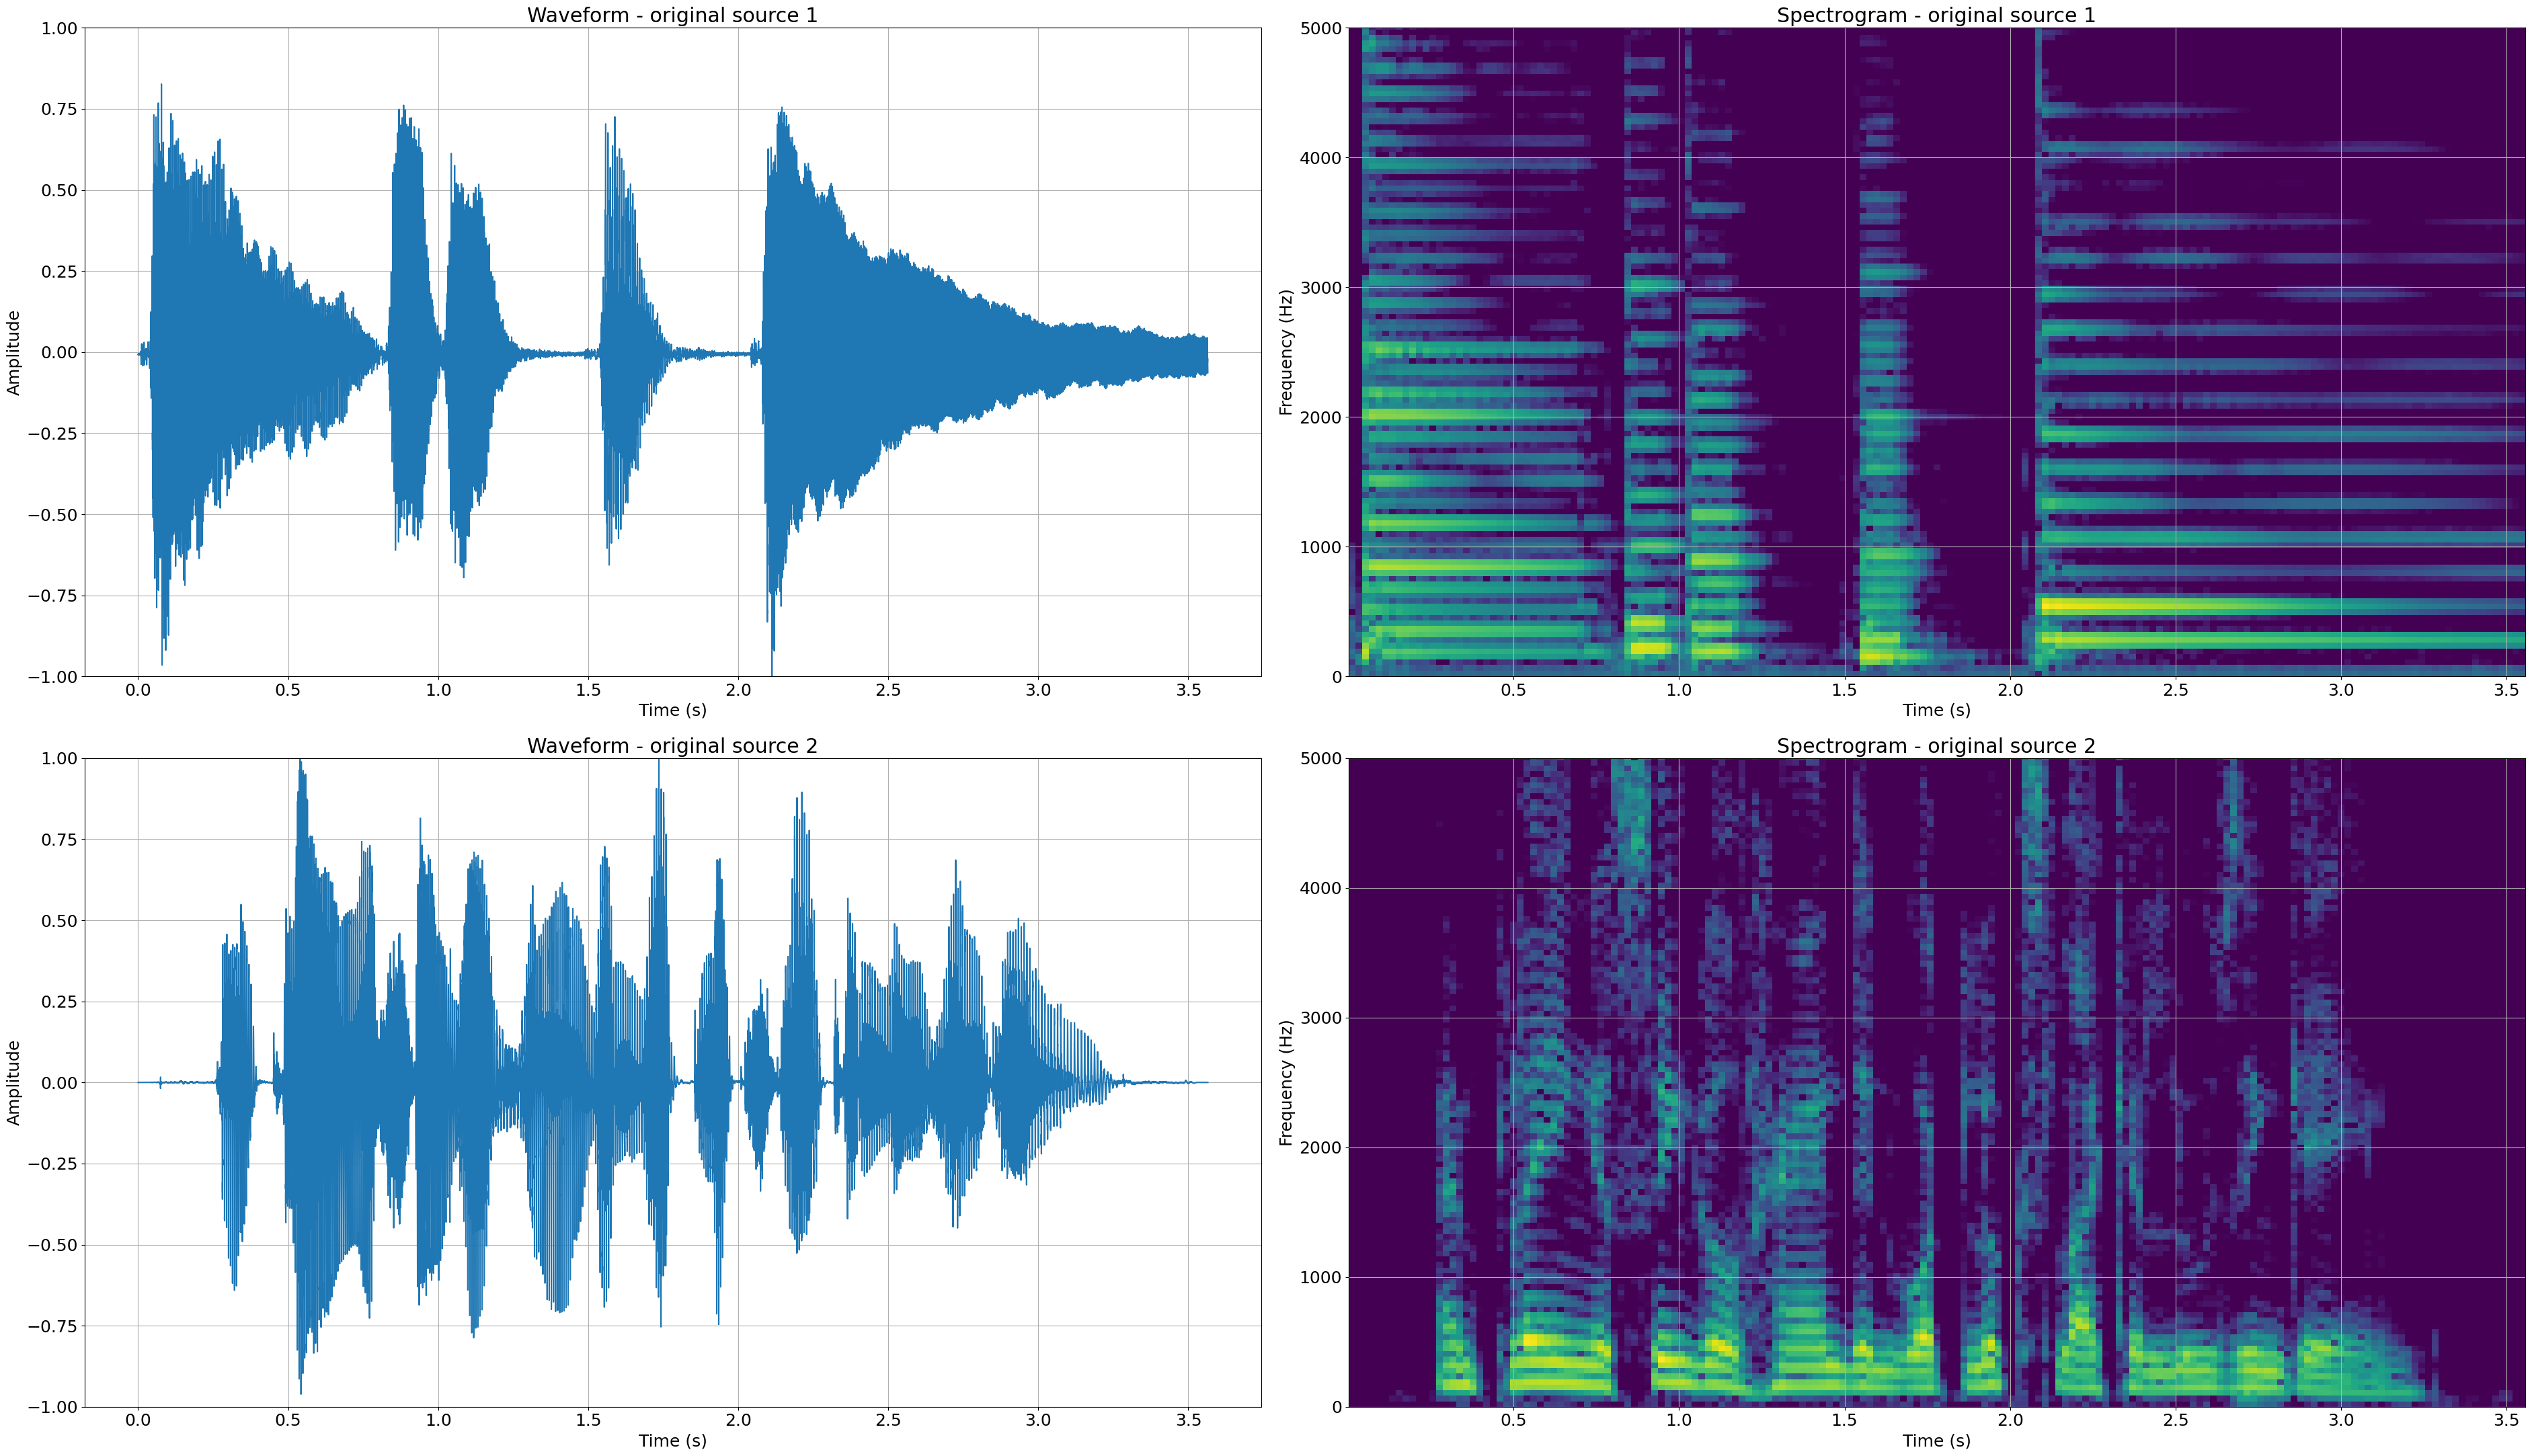

In [7]:
# Plotting the original sources
complete_plot(S, fs, show_histogram=False, names='original source')

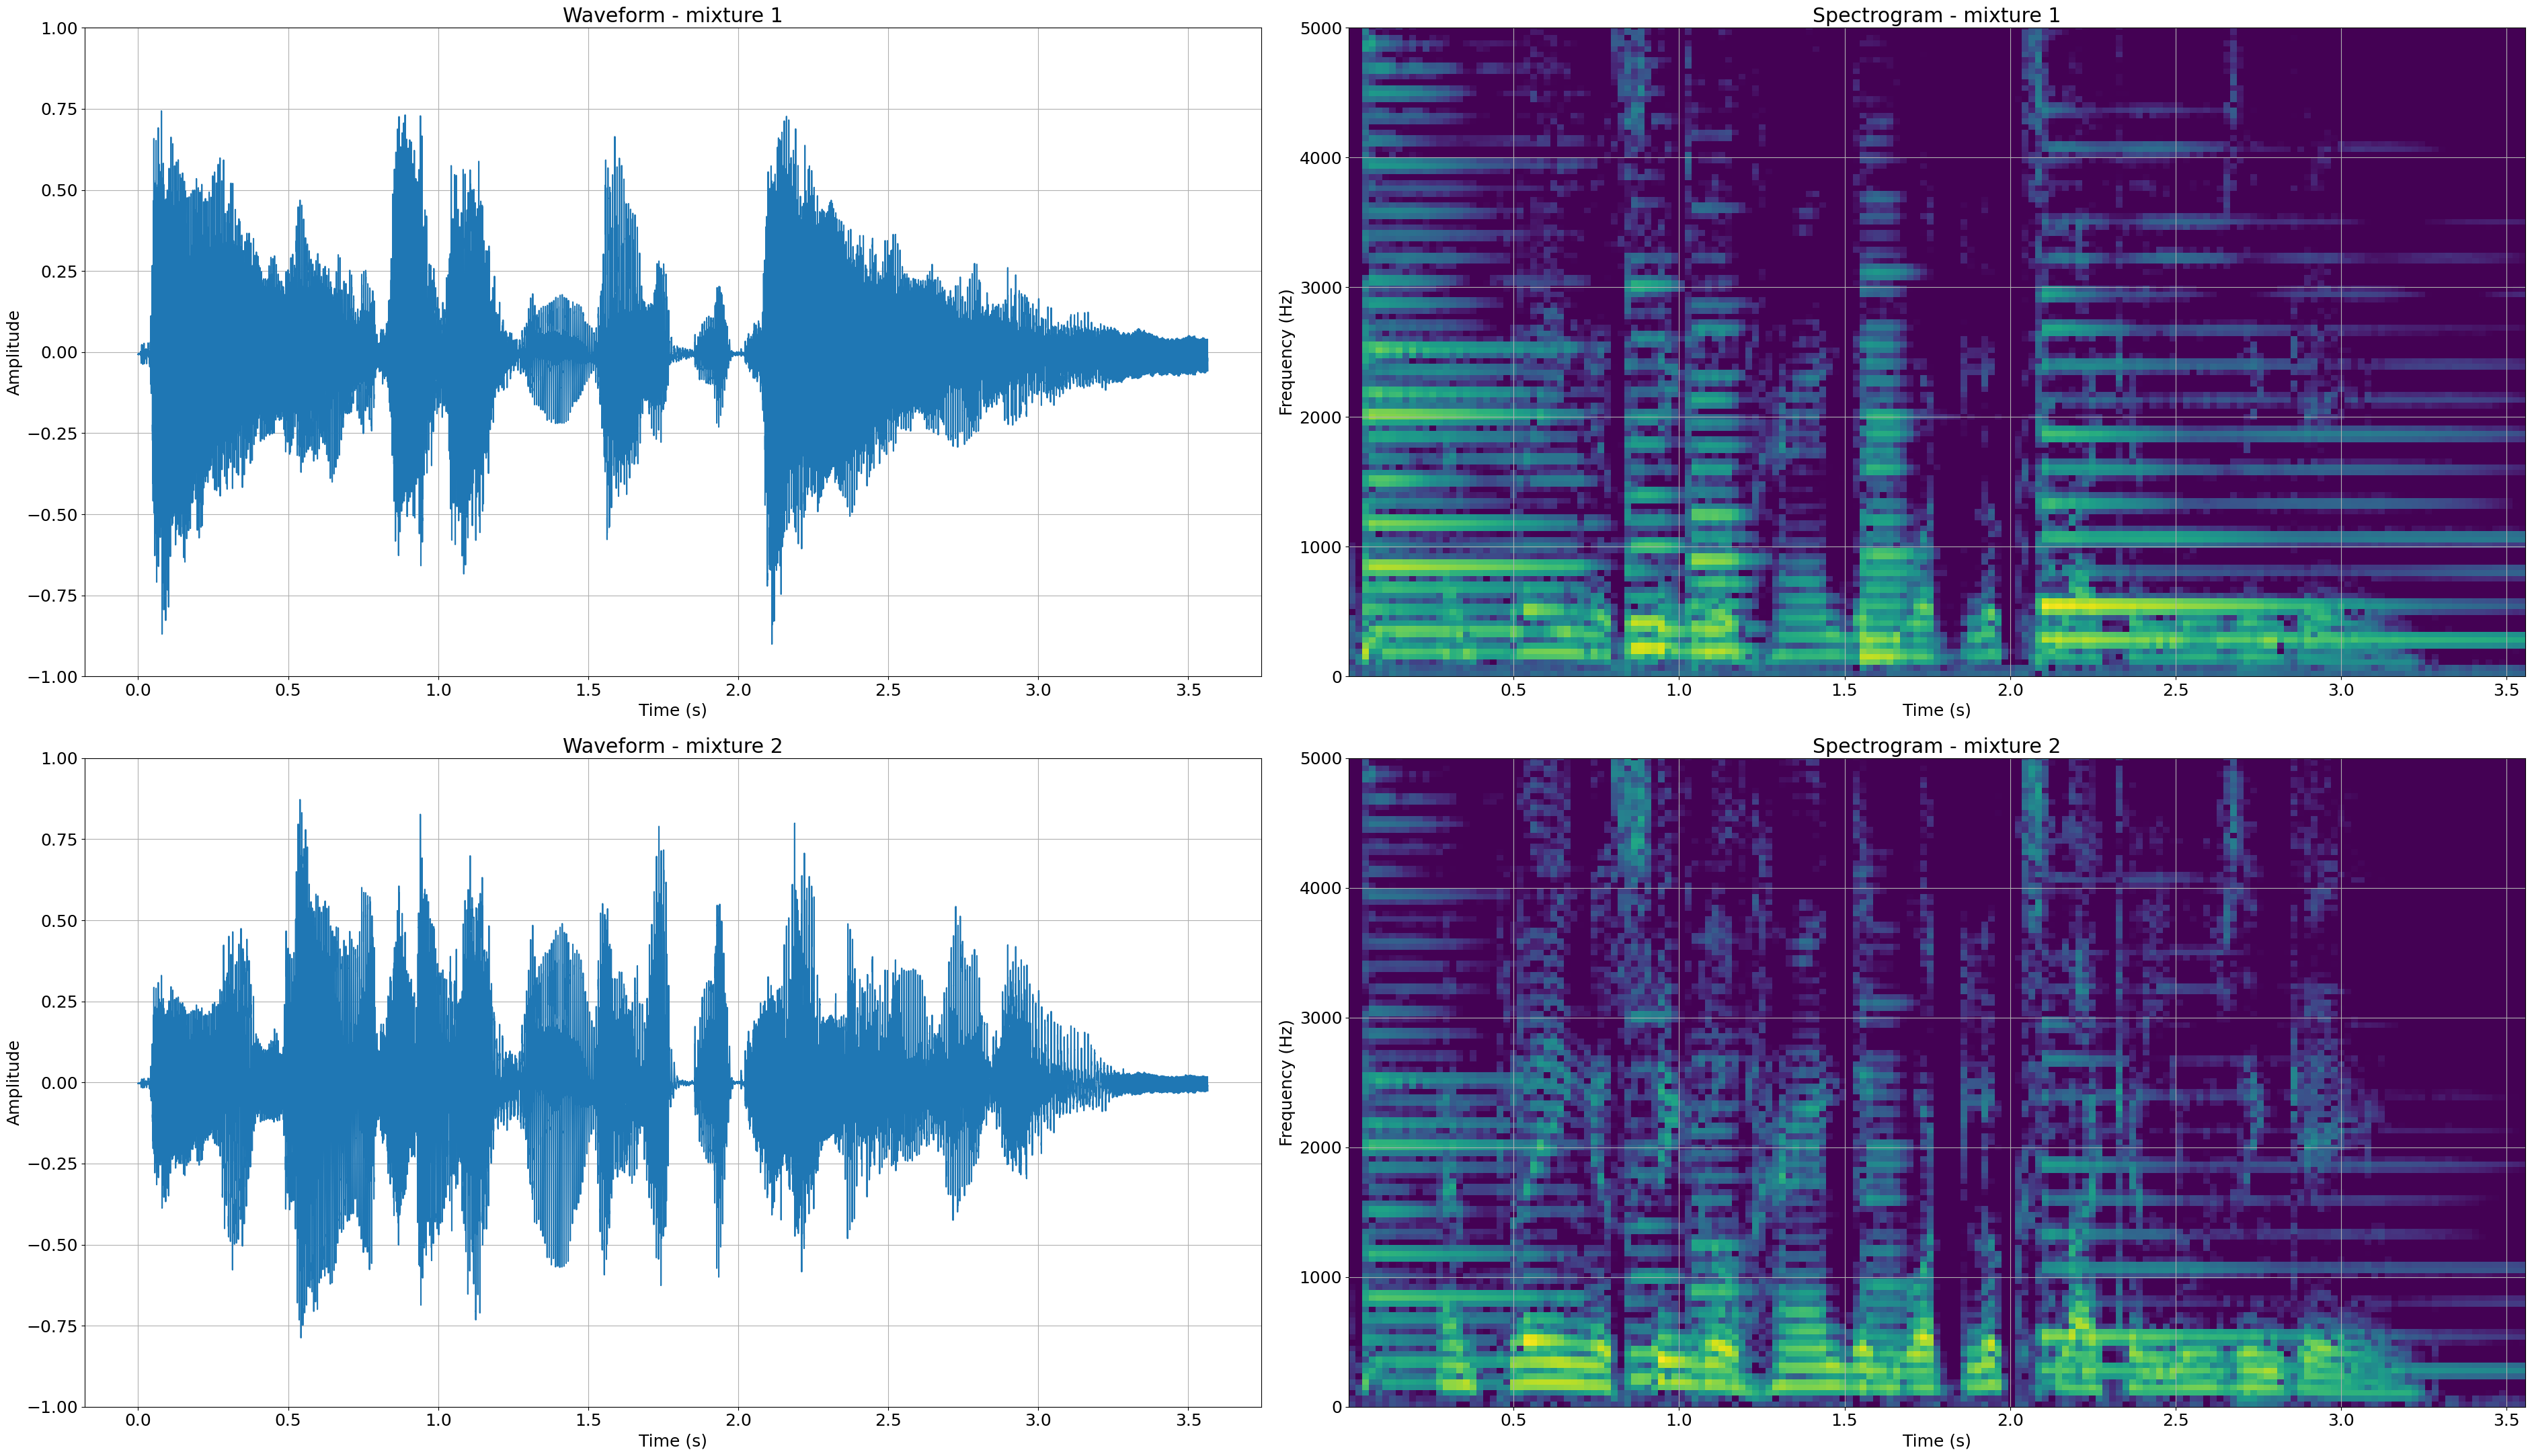

In [8]:
# Plotting the mixtures
complete_plot(X, fs, show_histogram=False, names='mixture')

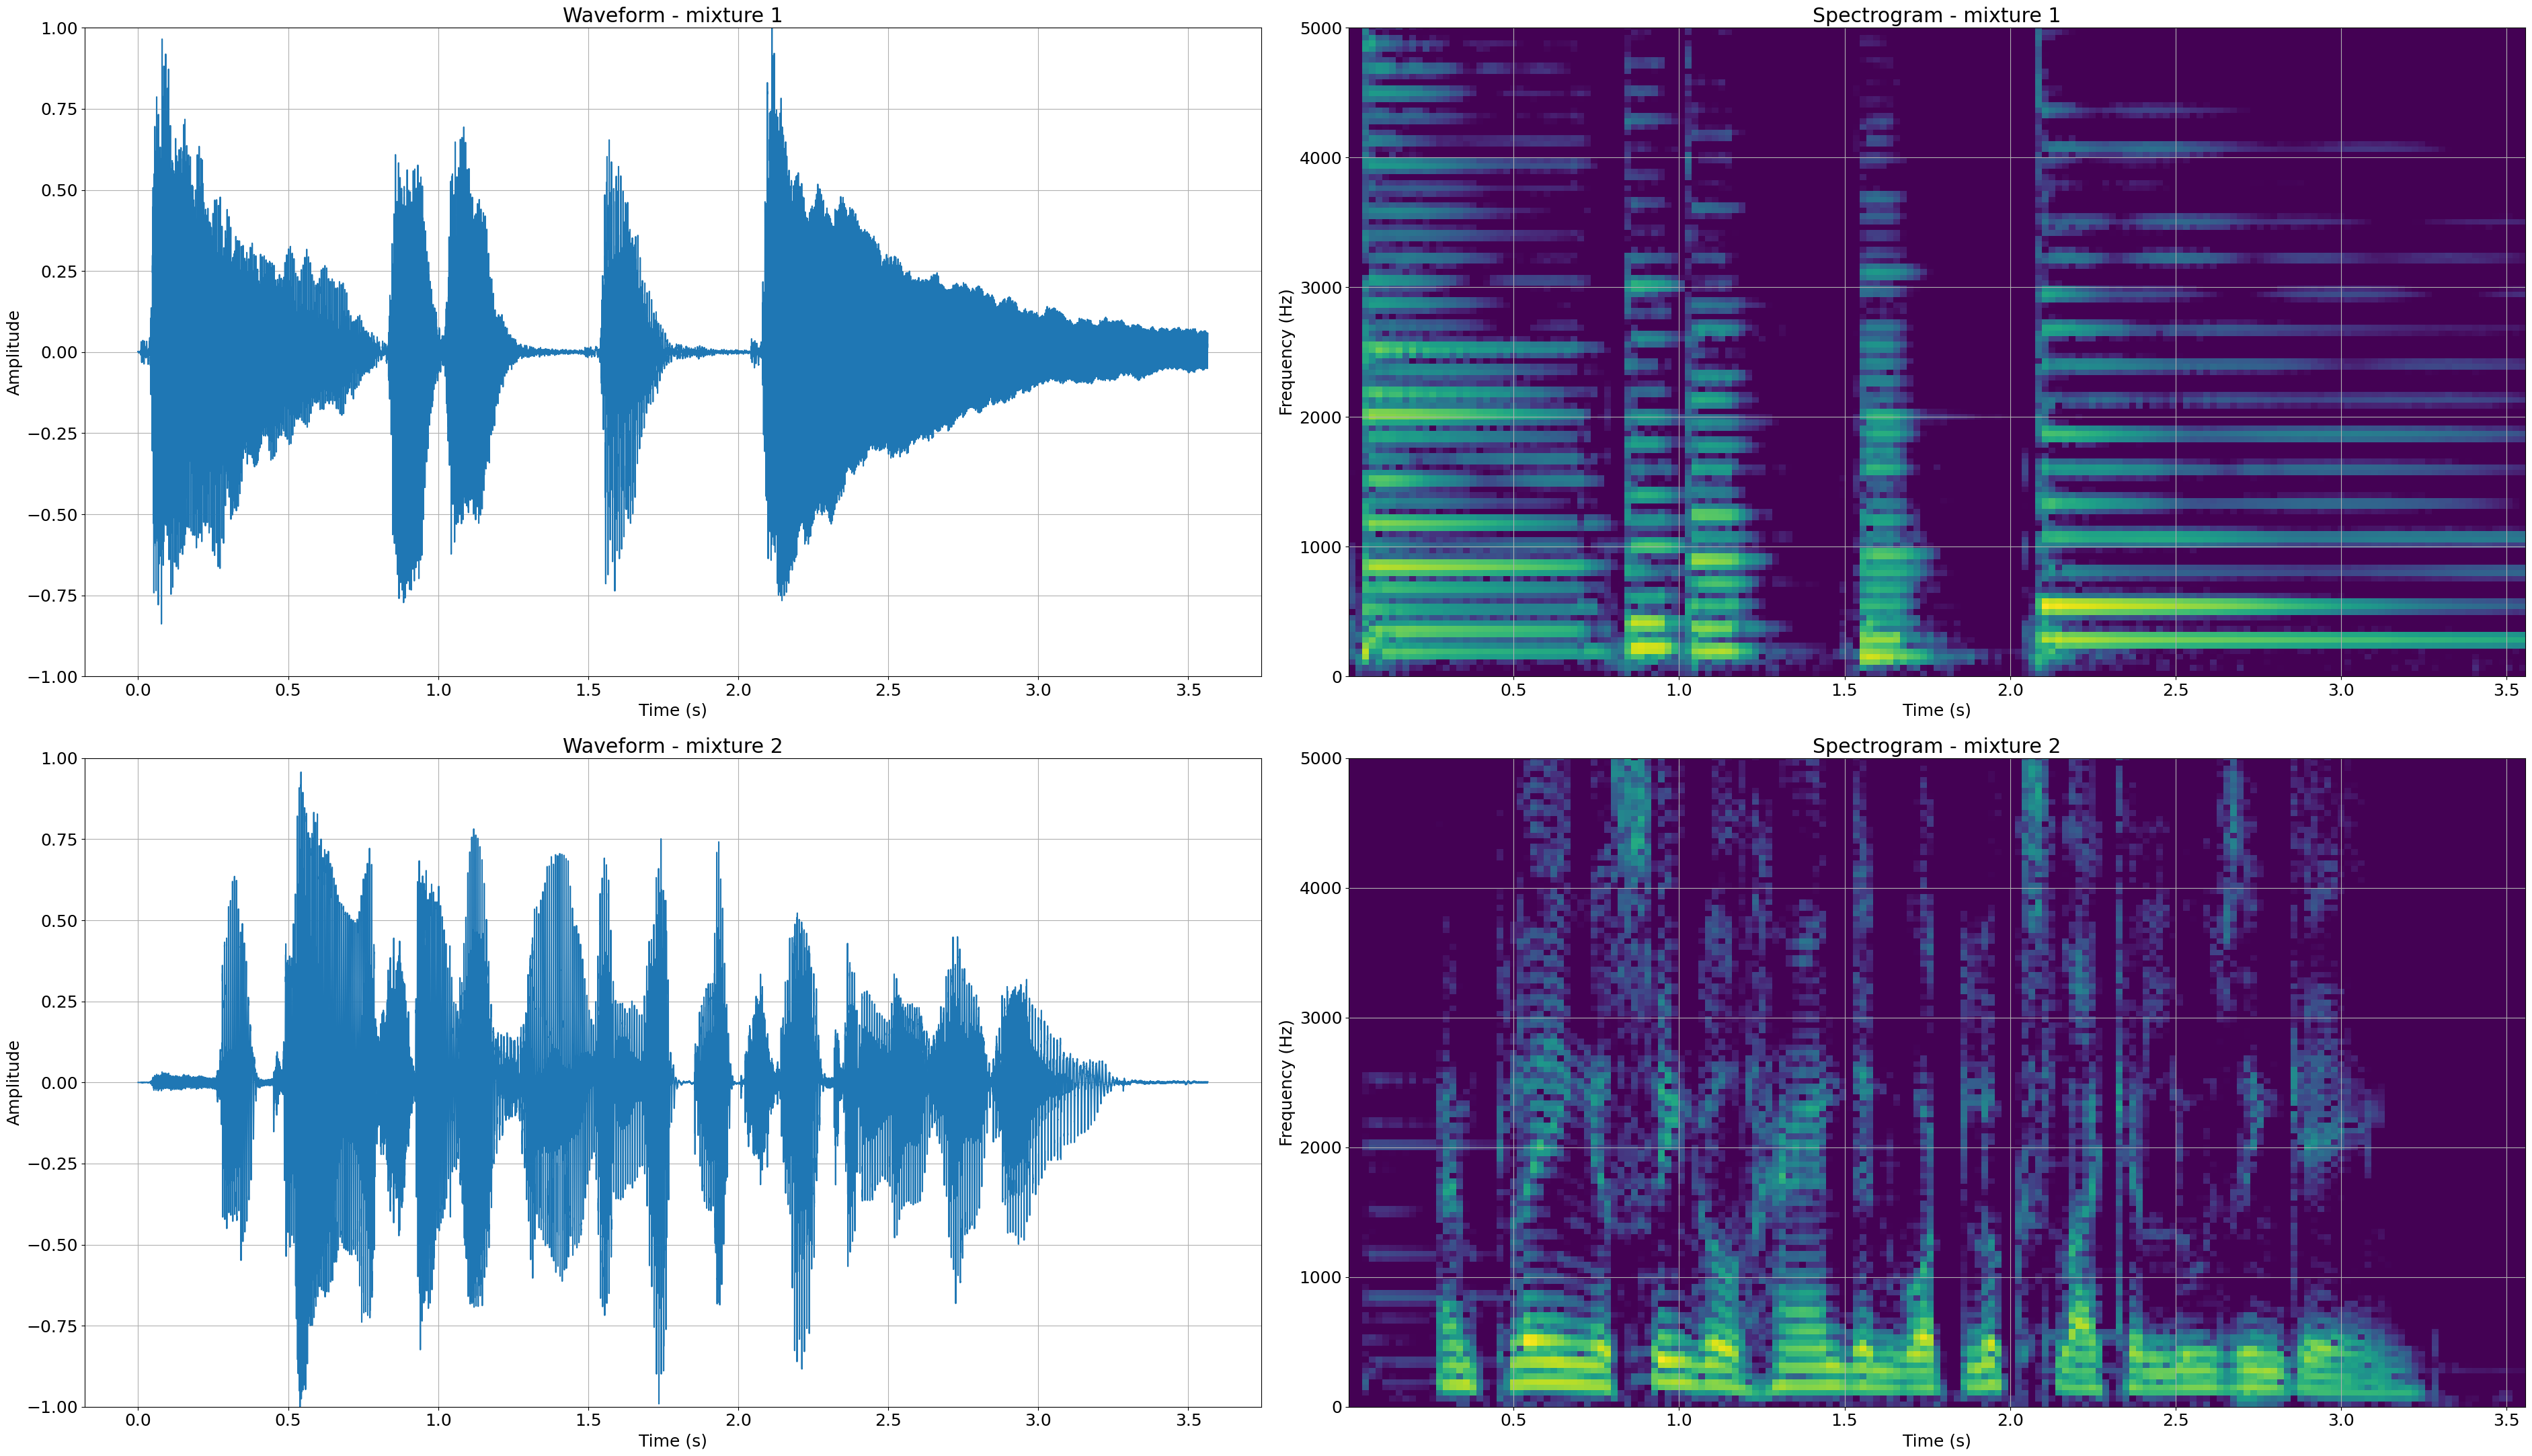

In [9]:
# Plotting the reconstructed signals
complete_plot(S_recovered_norm, fs, show_histogram=False, names='mixture')

## Audio Playback

Here we show how to play the audio of the various signals

In [10]:
# Original sound signals
audio_widget(S, fs, 'original')

original 1:


original 2:


In [11]:
# Mixture sound signals
audio_widget(X, fs, 'mixture')

mixture 1:


mixture 2:


In [12]:
# Reconstructed sound signals
audio_widget(S_recovered, fs, 'reconstructed')

reconstructed 1:


reconstructed 2:
